# Non-parametric Statistics 
## Chapter 3.1: Kernel Regression
### Use of Different Kernels

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

from scipy import stats

In [2]:
# this code should work for anyone who cloned the project via github
# as it ensures that you have the correct project structure
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, "..", ".."))
plots_folder = os.path.join(project_root, "plots/chap3")

# Please check this is correct path, hopefully it works fine
plots_folder

'/Users/adam/Desktop/Edinburgh/y4/MP/nonparam-stats-proj/plots/chap3'

In [10]:
# Define some kernels
def gaussian_kernel(x, sigma=1):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(- (x ** 2) / (2 * sigma ** 2))

def uniform_kernel(x):
    return np.where(np.abs(x) <= 1, 0.5, 0)

def epanechnikov_kernel(x):
    return np.where(np.abs(x) <= 1, 0.75 * (1 - x**2), 0)

def biweight_kernel(x):
    return np.where(np.abs(x) <= 1, 15/16 * (1 - x**2)**2, 0)

def cosine_kernel(x):
    return np.where(np.abs(x) <= 1, (np.pi / 4) * np.cos(np.pi * x / 2), 0)

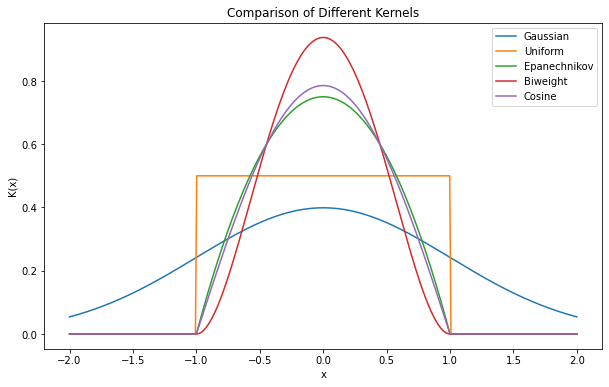

In [8]:
# ALL KERNELS IN ONE GO

x = np.linspace(-2, 2, 400)

# kernel values
gaussian_values = gaussian_kernel(x, 1)
uniform_values = uniform_kernel(x)
epanechnikov_values = epanechnikov_kernel(x)
biweight_values = biweight_kernel(x)
cosine_values = cosine_kernel(x)

# Plot the kernels
plt.figure(figsize=(10, 6))
plt.plot(x, gaussian_values, label='Gaussian')
plt.plot(x, uniform_values, label='Uniform')
plt.plot(x, epanechnikov_values, label='Epanechnikov')
plt.plot(x, biweight_values, label='Biweight')
plt.plot(x, cosine_values, label='Cosine')

# Add title and legend
plt.title("Comparison of Different Kernels")
plt.xlabel("x")
plt.ylabel("K(x)")
plt.legend()

# plt.savefig(os.path.join(plots_folder, 'univariate_all_kernel.png'))
plt.show()


AttributeError: 'Line2D' object has no property 'labe'

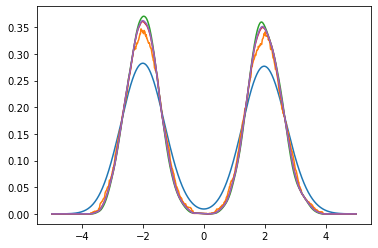

In [12]:
# Illustration of kde with different kernels

def custom_kde(data, kernel_func, bandwidth, x_grid):
    kde_values = np.zeros_like(x_grid)
    for xi in data:
        kde_values += kernel_func((x_grid - xi) / bandwidth)
    return kde_values / (len(data) * bandwidth)

# synthetic data: multimodal normal
data1 = np.random.normal(-2, 0.5, size=500)
data2 = np.random.normal(2, 0.5, size=500)
data = np.concatenate([data1, data2])
x = np.linspace(-5, 5, 1000)

# fixed bandwidth
bandwidth = 0.5

# KDE for each kernel
plt.plot(x, custom_kde(data, gaussian_kernel, bandwidth, x), label="Gaussian")
plt.plot(x, custom_kde(data, uniform_kernel, bandwidth, x), label="Uniform")
plt.plot(x, custom_kde(data, biweight_kernel, bandwidth, x), label="Biweight")
plt.plot(x, custom_kde(data, epanechnikov_kernel, bandwidth, x), label="Epanechnikov")
plt.plot(x, custom_kde(data, cosine_kernel, bandwidth, x), label="Cosine")

# Plotting the data histogram
# plt.hist(data, bins=30, density=True, alpha=0.5, label="Data Histogram")
plt.plot(x, data, labe="Data")


plt.legend(loc="upper right", fontsize="x-small")
plt.title("Kernel Density Estimates")
plt.xlabel("Data")
plt.ylabel("Density")

# plt.savefig(os.path.join(plots_folder, "example-kde-all-kernels.png"))
plt.show()

<ipython-input-24-253917f61bf4>:5: RuntimeWarning: invalid value encountered in true_divide
  rx[i] = Y[i] * kernel_func((x - data[i]) / bandwidth)/sum(kernel_func((x - data[i]) / bandwidth))


ValueError: setting an array element with a sequence.

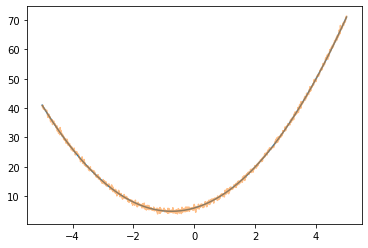

In [24]:
def custom_kr(Y, kernel_func, bandwidth, x):
    n = len(Y)
    rx = np.zeros_like(x)
    weights = np.zeros_like(x)
    for i in range(n):
        rx[i] = Y[i] * kernel_func((x - data[i]) / bandwidth)/sum(kernel_func((x - data[i]) / bandwidth))
    return rx

x = np.linspace(-5, 5, 1000)

data = 3*x + 2*x**2 + np.random.normal(0, 0.5, size = 1000) + 6
true = 3*x + 2*x**2 + 6

plt.plot(x, true, label="true")
plt.plot(x, data, label="raw", alpha=0.5)
plt.plot(x, custom_kr(data, gaussian_kernel, bandwidth, x), label="Gaussian")
plt.legend(loc="upper right", fontsize="x-small")

In [ ]:
# Illustration of kr with different kernels

def custom_kr(data, kernel_func, bandwidth, x_grid):
    kr_values = np.zeros_like(x_grid)
    for xi in data:
        kr_values += kernel_func((x_grid - xi) / bandwidth)
    return kr_values / (len(data) * bandwidth)

# synthetic data: multimodal normal
data1 = np.random.normal(-2, 0.5, size=500)
data2 = np.random.normal(2, 0.5, size=500)
data = np.concatenate([data1, data2])
x = np.linspace(-5, 5, 1000)


data = 3*x + 2*x**2 + np.random.normal(0, 0.5, size = 1000) + 6
true = 3*x + 2*x**2 + 6
plt.plot(x, true, label="true")


# fixed bandwidth
bandwidth = 0.5

# KDE for each kernel
plt.plot(x, custom_kr(data, gaussian_kernel, bandwidth, x), label="Gaussian")
plt.plot(x, custom_kr(data, uniform_kernel, bandwidth, x), label="Uniform")
plt.plot(x, custom_kr(data, biweight_kernel, bandwidth, x), label="Biweight")
plt.plot(x, custom_kr(data, epanechnikov_kernel, bandwidth, x), label="Epanechnikov")
plt.plot(x, custom_kr(data, cosine_kernel, bandwidth, x), label="Cosine")
plt.(data, bins=30, density=True, alpha=0.5, label="Data Histogram")

# Plotting the data histogram
plt.hist(data, bins=30, density=True, alpha=0.5, label="Data Histogram")


plt.legend(loc="upper right", fontsize="x-small")
plt.title("Kernel Density Estimates")
plt.xlabel("Data")
plt.ylabel("Density")

plt.savefig(os.path.join(plots_folder, "example-kde-all-kernels.png"))
plt.show()